# 2.3 Lab: Introduction to ~~R~~ Python

## 2.3.2 Graphics

In this lab, we will work through some plotting and graphic commands. R has 2 libraries that are generally used, the main plot library and `ggplot2`. 

### Libraries

Common graphic libraries used within Python are: 

* `matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. https://matplotlib.org/
* `mpl_toolkits.mplot3d` The mplot3d toolkit adds simple 3D plotting capabilities to matplotlib by supplying an axes object that can create a 2D projection of a 3D scene. The resulting graph will have the same look and feel as regular 2D plots. https://matplotlib.org/1.4.3/mpl_toolkits/mplot3d/index.html
* `seaborn` is a library for making statistical graphics in Python and is built on top of matplotlib. https://seaborn.pydata.org/introduction.html

### Imports


In [89]:
from typing import List, Dict, Tuple, Sequence, Union # annotation library
import sys # system library 
import os 
import tempfile

import statsmodels # root namespace for intellisense and deep reference
import statsmodels.api as statsModels # alias to hide the extra api namespace

import numpy   # as np
import pandas  # as pd

from sklearn import * # import all child namespaces 

import matplotlib.pyplot as pyplot
from mpl_toolkits import mplot3d   # matplotlib 3d plotting
import seaborn 

### Basic Plots


**R Code**
```
# generate random scatter plot
x = rnorm (100)
y = rnorm (100)
plot (x, y)
plot (x, y, xlab = "this is the x-axis", ylab = "this is the y-axis", main = "Plot of X vs Y")

# save to pdf 
pdf ("Figure.pdf")
plot (x, y, col = "green")
dev.off ()
```

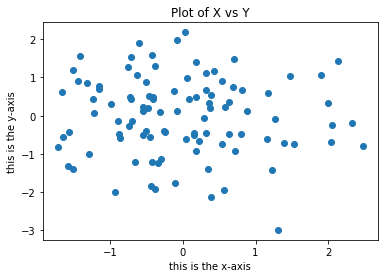

In [26]:
# generate random normals 
x = numpy.random.normal (size = 100)
y = numpy.random.normal (size = 100)

# scatter plot, returns paths : `~matplotlib.collections.PathCollection`
axes = pyplot.scatter (x = x, y = y)
pyplot.title ("Plot of X vs Y")
pyplot.xlabel ("this is the x-axis")
pyplot.ylabel ("this is the y-axis")

# save the plot to a PDF in the temp directory
pyplot.savefig (os.path.join (tempfile.gettempdir (), "Figure.pdf"))

[Text(0, 0.5, 'this is the y-axis'),
 Text(0.5, 0, 'this is the x-axis'),
 Text(0.5, 1.0, 'Plot of X vs Y')]

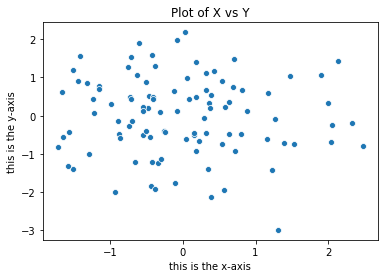

In [31]:
# seaborn scatter plot 
axes = seaborn.scatterplot (x = x, y = y)
axes.set (xlabel = "this is the x-axis", ylabel = "this is the y-axis", title ="Plot of X vs Y")


### Sequences

The function `seq()` in R can be used to create a sequence of numbers with range and steps. Python has the following functions to help create sequences: `range`, `numpy.arange`, and `numpy.linspace`. For integer-based sequences, you can use `numpy.arange`, and for non-integer-based sequences, you can use `numpy.linspace`.

The `range(start, stop[, step])` function is on the interval of [a, b) where b is no included in the range with a default step of 1. The 3rd argument to the method is the step size. Range will only work with integers and can be converted to an array with list. This method is good for for loops, but is not useful for non-integer ranges.

The `numpy.arange([start, ]stop, [step, ]dtype=None)` returns evenly spaced values within a given interval `[start, stop)` as a `numpy.ndarray`. While it supports non-integer steps, the results may be inconsistent, and it is recommended to use `numpy.linspace`.

The `numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)` function returns evenly spaced values within a given interval `[start, stop]` (notice the closed interval). The endpoint of the interval can optionally be excluded, making it an open interval `[start, stop)`. This does support non-integer steps.

**R Code**
```
# create a sequence from 1 to 10
x = seq (1, 10)
 [1] 1 2 3 4 5 6 7 8 9 10

# create a sequence from 1 to 10
x = 1:10 
 [1] 1 2 3 4 5 6 7 8 9 10

# create 50 numbers for [-pi, pi] equally spaced
x = seq (-pi, pi, length = 50)
```

In [43]:
x = list (range (1, 11, 1))
print (x)

x = numpy.arange (1, 11, 1)
print (x)

x = numpy.linspace (-numpy.pi, numpy.pi, num = 50)
print (x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[ 1  2  3  4  5  6  7  8  9 10]
[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


### Contour Plots

The R `outer` function provides the outer product of the arrays X and Y as the array A with dimension c(dim(X), dim(Y)) where element A[c(arrayindex.x, arrayindex.y)] = FUN(X[arrayindex.x], Y[arrayindex.y], …).

A way to replicate the outer function in Python is through nested loops and an anonymous function. This can be collapsed into a single line. Most of the time, this would not be recommended as a single line as it makes it harder to debug or troubleshoot what is going on in the function itself. Instead, if the calculation or logic is complex, we can used a named function and make the call to it. 

```
numpy.array ([[{function} for currentX in x] for currentY in y])
numpy.array ([[{named-function} (currentX, currentY) for currentX in x] for currentY in y])
```

**R Code**
```
# create x and y vectors 
x = seq (-pi, pi, length = 50)
y = x

# for each pair (x, y), perform the anonymous function 
# to calculate cos (y) / (1 + x^2)
f = outer (x, y, function (x, y) cos (y) / (1 + x^2))

# first contour plot
contour (x, y, f)

# second contour plot, add to current plot (add = TRUE)
contour (x, y, f, nlevels = 45, add = TRUE)

# third contour plot
fa = (f -t(f)) / 2
contour (x, y, fa, nlevels = 15)

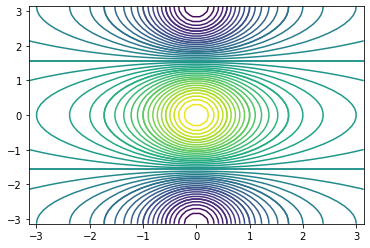

In [71]:
# create x and y vectors
x = numpy.linspace (start = -numpy.pi, stop = numpy.pi, num = 50)
y = x

# use an index to cycle through x and y pairs (expecting that they are the same shape)
f = numpy.array ([[numpy.cos (currentY) / (1 + currentX ** 2) for currentX in x] for currentY in y])

pyplot.contour (x, y, f)
pyplot.contour (x, y, f, levels = 45)

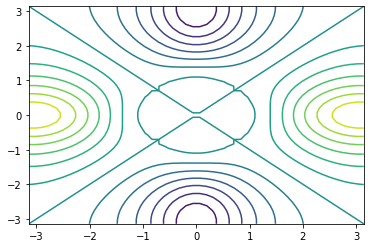

In [73]:
fa = (f - f.transpose ()) / 2
pyplot.contour (x, y, fa, levels = 15)

### Heatmap and Perspective Plots

**R Code**
```
# heatmap 
image (x, y, fa)

# theta and phi control the axis rotation
# angles defining the viewing direction. 
# theta gives the azimuthal direction and phi the colatitude.
persp (x, y, fa)
persp (x, y, fa, theta = 30)
persp (x, y, fa, theta = 30, phi = 20)
persp (x, y, fa, theta = 30, phi = 70)
persp (x, y, fa, theta = 30, phi = 40)
```

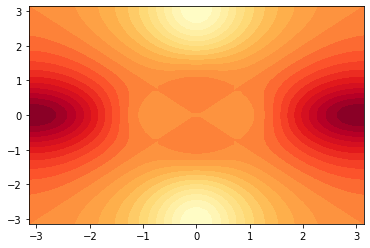

In [88]:
pyplot.contourf (x, y, fa, 25, cmap = "YlOrRd")

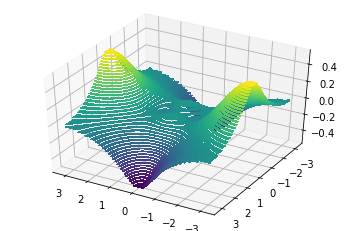

In [115]:
# create the 3d contour plot
figure = pyplot.figure ()
axes: mplot3d.Axes3D = figure.add_subplot (projection = "3d")
axes.contourf (X = x, Y = y, Z = fa, levels = 45)
axes.view_init (40, 120)



Object `contour3D` not found.
